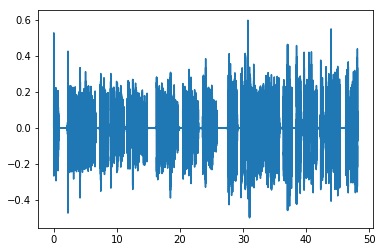

In [8]:
import sys
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt


#音声ファイル読み込み
args = sys.argv
wav_filename = args[1]
rate, data = scipy.io.wavfile.read('asano.wav')

##### 音声データをそのまま表示する #####
#縦軸（振幅）の配列を作成   #16bitの音声ファイルのデータを-1から1に正規化
data = data / 32768
#横軸（時間）の配列を作成　　#np.arange(初項, 等差数列の終点, 等差)
time = np.arange(0, data.shape[0]/rate, 1/rate)  
#データプロット
plt.plot(time, data)
plt.show()

In [2]:
cd

C:\Users\YUYA ANDO


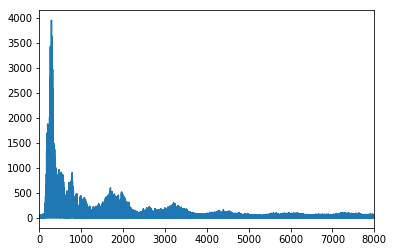

In [9]:
import sys
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt


#音声ファイル読み込み
args = sys.argv
wav_filename = args[1]
rate, data = scipy.io.wavfile.read('asano.wav')


#（振幅）の配列を作成
data = data / 32768

##### 周波数成分を表示する #####
#縦軸：dataを高速フーリエ変換する（時間領域から周波数領域に変換する）
fft_data = np.abs(np.fft.fft(data))    
#横軸：周波数の取得　　#np.fft.fftfreq(データ点数, サンプリング周期)
freqList = np.fft.fftfreq(data.shape[0], d=1.0/rate)  
#データプロット
plt.plot(freqList, fft_data)
plt.xlim(0, 8000) #0～8000Hzまで表示
plt.show()

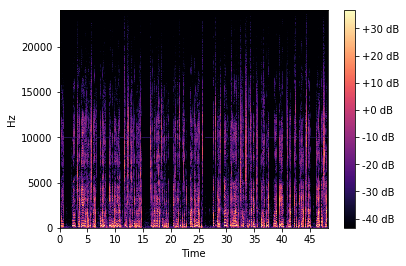

In [10]:
import sys
import numpy as np
import librosa
import matplotlib.pyplot as plt
import scipy.io.wavfile
import librosa.display


#音声ファイル読み込み
args = sys.argv
wav_filename = args[1]
rate, data = scipy.io.wavfile.read('asano.wav')

#16bitの音声ファイルのデータを-1から1に正規化
data = data / 32768
# フレーム長
fft_size = 1024                 
# フレームシフト長 
hop_length = int(fft_size / 4)  


# 短時間フーリエ変換実行
amplitude = np.abs(librosa.core.stft(data, n_fft=fft_size, hop_length=hop_length))

# 振幅をデシベル単位に変換
log_power = librosa.core.amplitude_to_db(amplitude)

# グラフ表示
librosa.display.specshow(log_power, sr=rate, hop_length=hop_length, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')  
plt.show()                   